In [1]:
# libraries
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pathlib import Path

In [2]:
data_dir=Path("data/data")

In [3]:
target_dir=data_dir /"2024"

In [4]:
train_dir=target_dir/"train"
test_dir=target_dir/"test"

In [5]:
def read_data(filenames,columns=None):
    """ Read parquet data from mutiple files """

    dataframes = [ 
        
        pd.read_parquet(filenames, columns=columns)
    ]
    
    return pd.concat(dataframes)

In [12]:
relevant_columns = ['title', 'description', 'tags','bottom_category_id','type']

df_train = read_data(train_dir, columns=relevant_columns)

In [13]:
len(df_train)

229624

In [14]:
df_train['bottom_category_id'].value_counts()

bottom_category_id
2070     98
46       98
1046     98
12186    98
2371     98
         ..
12405    44
11220    44
12356    43
6796     42
2101     42
Name: count, Length: 2609, dtype: int64

In [9]:
df_train['combined_text'] = df_train['title'] + " " + df_train['description'] + " " + df_train['tags']
y = df_train['bottom_category_id']
X = df_train[['combined_text', 'type']]


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [12]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('text', TfidfVectorizer(max_features=1000), 'combined_text'),
        ('type', OneHotEncoder(), ['type'])
    ])),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])


In [13]:
param_grid = {
    'clf__C': [1],
    'clf__penalty': ['l2']
}


In [14]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', verbose=1)


In [15]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('text',
                                                                         TfidfVectorizer(max_features=1000),
                                                                         'combined_text'),
                                                                        ('type',
                                                                         OneHotEncoder(),
                                                                         ['type'])])),
                                       ('clf',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'clf__C': [1], 'clf__penalty': ['l2']},
             scoring='f1_macro', verbose=1)

In [16]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'clf__C': 1, 'clf__penalty': 'l2'}


In [17]:
best_model = grid_search.best_estimator_


In [18]:
y_pred = best_model.predict(X_test)


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.03      0.06        32
           2       0.56      0.18      0.27        28
           3       0.40      0.57      0.47        30
           4       0.33      0.54      0.41        26
           5       0.54      0.37      0.44        35
           6       0.50      0.18      0.26        17
           7       0.67      0.07      0.12        30
           8       0.24      0.55      0.33        22
           9       0.00      0.00      0.00        19
          10       0.33      0.04      0.07        24
          11       0.64      0.64      0.64        25
          12       0.20      0.14      0.16        29
          13       0.70      0.70      0.70        30
          14       0.19      0.23      0.21        26
          15       0.38      0.64      0.47        33
          16       0.17      0.23      0.19        26
          17       0.36      0.19      0.25        26
          18       0.46    

c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [20]:
test_columns=['product_id','title', 'description', 'tags','type']

In [21]:
df_test=read_data(test_dir, test_columns)

In [22]:
df_test['combined_text'] = df_test['title'].fillna('') + ' ' + df_test['description'].fillna('') + ' ' + df_test['tags'].fillna('')


In [23]:
test_text_combined = df_test['combined_text'].values

In [24]:
test_pred=best_model.predict(test_text_combined)

ValueError: X does not contain any features, but ColumnTransformer is expecting 2 features

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from scipy.sparse import hstack



In [26]:

df_train['combined_text'] = df_train['title'] + " " + df_train['description'] + " " + df_train['tags']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_text = tfidf_vectorizer.fit_transform(df_train['combined_text'])

type_encoder = LabelEncoder()
X_type = type_encoder.fit_transform(df_train['type'])




In [27]:
X = hstack([X_text, X_type[:, None]])

y = df_train['bottom_category_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [17]:
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [18]:
param_grid = {
    'tfidf__ngram_range': [(1, 2)],
    'tfidf__max_features': [5000],
    'nb__alpha': [ 0.1,1,0.01]
}

In [19]:
df_training, df_validation = train_test_split(
    df_train,
    test_size=0.3,
    stratify=df_train['bottom_category_id'],
    random_state=42
)

In [20]:
# Combine text columns for feature extraction
df_training['combined_text'] = df_training['title'].fillna('') + ' ' + df_training['description'].fillna('') + ' ' + df_training['tags'].fillna('')
df_validation['combined_text'] = df_validation['title'].fillna('') + ' ' + df_validation['description'].fillna('') + ' ' + df_validation['tags'].fillna('')

train_text_combined = df_training['combined_text'].values
val_text_combined = df_validation['combined_text'].values


In [21]:
val_label=df_validation['bottom_category_id']

In [22]:
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, scoring='f1_weighted', verbose=1)


In [23]:
grid_search.fit(train_text_combined, df_training['bottom_category_id'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 1, 0.01],
                         'tfidf__max_features': [5000],
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='f1_weighted', verbose=1)

In [24]:
nb_model = grid_search
val_pred_bottom = nb_model.predict(val_text_combined)

In [26]:
from sklearn.metrics import f1_score


In [27]:
val_f1_score = f1_score(val_label, val_pred_bottom, average='weighted')
print(f"Validation F1 score with Naive Bayes: {val_f1_score:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Validation F1 score with Naive Bayes: 0.5645
Best Parameters: {'nb__alpha': 0.01, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}


In [29]:
from sklearn import metrics

In [30]:
print(metrics.classification_report(val_label, val_pred_bottom))

c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      0.12      0.19        26
           2       0.91      0.34      0.50        29
           3       0.47      0.65      0.55        26
           4       0.55      0.44      0.49        27
           5       0.58      0.62      0.60        29
           6       0.42      0.31      0.36        26
           7       0.55      0.62      0.58        26
           8       0.74      0.82      0.78        28
           9       0.24      0.26      0.25        27
          10       0.48      0.56      0.52        27
          11       0.96      0.85      0.90        27
          12       0.59      0.48      0.53        27
          13       0.79      0.88      0.84        26
          14       0.84      0.96      0.90        28
          15       0.72      0.82      0.77        28
          16       0.50      0.44      0.47        27
          17       0.43      0.50      0.46        26
          18       0.85    

c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
test_columns=['product_id','title', 'description', 'tags','type']

In [33]:
def read_files(parquet_files,columns):


    df = [

        pd.read_parquet(parquet_files, columns=columns)
    ]

    return pd.concat(df)

In [34]:
df_test=read_files(test_dir, test_columns)

In [35]:
required_columns = ['title', 'description', 'tags','type']

In [36]:
df_test['combined_text'] = df_test['title'].fillna('') + ' ' + df_test['description'].fillna('') + ' ' + df_test['tags'].fillna('')
df_test_combined = df_test['combined_text'].values

In [38]:
test_pred_nb=nb_model.predict(df_test_combined)

In [133]:
len(df_test_combined)

25514

In [39]:
df_prediction=pd.DataFrame()

In [40]:
df_prediction["bottom_category_id"]=test_pred_nb

In [41]:
df_prediction.to_csv('sharjil_etsy_bottom.csv', index=False)

### Primary color

In [43]:
color_columns=["primary_color_id","secondary_color_id","image/encoded"]


In [44]:
df_train = read_data(train_dir,columns=color_columns)

In [45]:
from torchvision import transforms
import torch

def preprocess_image(encoded_images):
    transform_augment_2= transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(10),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    
    processed_images = []
    for encoded_image in encoded_images:
        
        image = Image.open(io.BytesIO(encoded_image))
        
        
        processed_image = transform_augment_2(image)
        processed_images.append(processed_image)

    
    return torch.stack(processed_images)
  


In [46]:
X_images = preprocess_image(df_train['image/encoded'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


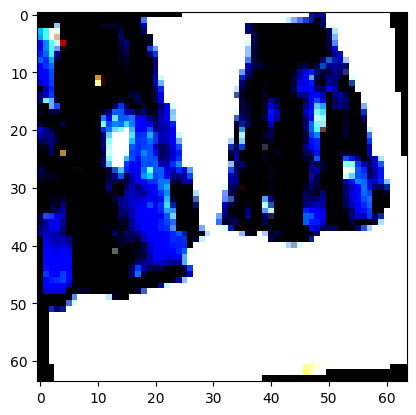

In [47]:
img_x_image=next(iter(X_images))
plt.imshow(img_x_image.permute(1,2,0))

In [48]:
df_train['primary_color_id'][0]

2

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['primary_color_id'])

In [50]:
y[0]

2

In [51]:
y.shape,X_images.shape

((229624,), torch.Size([229624, 3, 64, 64]))

In [52]:
type(y)

numpy.ndarray

In [53]:
y_tensor=torch.tensor(y)

In [54]:
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(X_images, y_tensor)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))])




In [56]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset)

In [57]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [58]:
from torchvision import models
import torch.nn as nn


In [59]:
prim_color_model = models.efficientnet_b0(pretrained=True).to(device)


c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [60]:
prim_color_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [64]:
df_train['primary_color_id'].unique()

array([ 2, 11, 17, 12, 18, 14,  1, 13,  0,  9, 10, 19,  7,  4,  3,  5, 16,
        6, 15], dtype=int64)

In [61]:
num_features = prim_color_model.classifier[1].in_features



In [62]:
num_features

1280

In [74]:
prim_color_model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 19)
).to(device)


In [75]:
prim_color_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [76]:
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = torch.optim.Adam(prim_color_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, min_lr=1e-6, verbose=True)


In [77]:
loss_fn = nn.CrossEntropyLoss()
scaler = GradScaler()

In [79]:
import copy
early_stopping_patience = 5
min_val_loss = float('inf')
patience_counter = 0

best_model_wts = copy.deepcopy(prim_color_model.state_dict())
best_acc = 0.0

prim_color_model.train()
for epoch in range(50):  # Adjust the number of epochs
    train_loss = 0.0
    train_acc = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        with autocast():
            outputs = prim_color_model(inputs)
            loss = loss_fn(outputs, labels)
            
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        train_acc += (predicted == labels).sum().item()
        total += labels.size(0)
        
    avg_train_loss = train_loss / total
    avg_train_acc = train_acc / total
    
    # Validation phase
    prim_color_model.eval()
    val_loss = 0.0
    val_acc = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = prim_color_model(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_acc += (predicted == labels).sum().item()
            total_val += labels.size(0)
    
    avg_val_loss = val_loss / total_val
    avg_val_acc = val_acc / total_val
    
    print(f'Epoch {epoch}: Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}')
    
    # Dynamic Learning Rate Adjustment
    scheduler.step(avg_val_loss)
    
    # Early Stopping Check
    if avg_val_loss < min_val_loss:
        min_val_loss = avg_val_loss
        best_model_wts = copy.deepcopy(prim_color_model.state_dict())
        best_acc = avg_val_acc
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered.")
        break

prim_color_model.load_state_dict(best_model_wts)
print(f'Best Validation Accuracy: {best_acc:.4f}')

Epoch 0: Train Loss: 1.9520, Train Acc: 0.4058, Val Loss: 1.8687, Val Acc: 0.4291
Epoch 1: Train Loss: 1.9064, Train Acc: 0.4216, Val Loss: 1.8941, Val Acc: 0.4229
Epoch 2: Train Loss: 1.8519, Train Acc: 0.4354, Val Loss: 1.9012, Val Acc: 0.4204
Epoch 3: Train Loss: nan, Train Acc: 0.4459, Val Loss: 1.8539, Val Acc: 0.4367
Epoch 4: Train Loss: nan, Train Acc: 0.2333, Val Loss: 3.4733, Val Acc: 0.1229
Epoch 5: Train Loss: 2.9107, Train Acc: 0.1131, Val Loss: 2.9263, Val Acc: 0.0879
Epoch 6: Train Loss: 2.9173, Train Acc: 0.1094, Val Loss: 2.9360, Val Acc: 0.1229
Epoch 7: Train Loss: 2.9429, Train Acc: 0.1250, Val Loss: 2.9444, Val Acc: 0.1229
Epoch 8: Train Loss: 2.9453, Train Acc: 0.0543, Val Loss: 2.9444, Val Acc: 0.0538
Early stopping triggered.
Best Validation Accuracy: 0.4367


In [80]:
# Define your model's file path
model_save_path = "primary_color_id.pt"

# Save the model state
torch.save(prim_color_model.state_dict(), model_save_path)

In [81]:
test_columns_color=['image/encoded']

In [83]:
df_test_color = read_data(test_dir,columns=test_columns_color)

In [84]:
from torchvision import transforms
import torch

def preprocess_image_test(encoded_images):
    transform_augment_2= transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    
    processed_images = []
    for encoded_image in encoded_images:
        
        image = Image.open(io.BytesIO(encoded_image))
        
        
        processed_image = transform_augment_2(image)
        processed_images.append(processed_image)

    
    return torch.stack(processed_images)

In [111]:
X_images_test = preprocess_image_test(df_test_color['image/encoded'])

In [119]:
dataset = TensorDataset(X_images_test)

In [120]:
test_loader_val=DataLoader(dataset)

In [121]:
len(X_images_test)

25514

In [90]:
import numpy as np

In [144]:
predicted_test_=[]
predicted_test_

[]

In [93]:
device

'cuda'

In [107]:
import random
aa=random.random()

0.008137746526793

In [145]:
prim_color_model.eval()

with torch.no_grad():
        for inputs_tuple in test_loader_val:
            inputs = inputs_tuple[0]
            
            inputs = inputs.to(device)
            
            outputs = prim_color_model(inputs)
            _, predicted_test = torch.max(outputs, 1)
            predicted_test_.extend(predicted_test.cpu().numpy().tolist())
            

In [146]:
predicted_test_

[10,
 16,
 2,
 13,
 1,
 4,
 7,
 2,
 13,
 1,
 10,
 4,
 13,
 13,
 10,
 0,
 2,
 17,
 0,
 17,
 8,
 16,
 16,
 8,
 11,
 10,
 8,
 13,
 17,
 4,
 2,
 1,
 8,
 8,
 8,
 1,
 2,
 7,
 4,
 4,
 16,
 1,
 16,
 4,
 2,
 16,
 16,
 4,
 16,
 12,
 2,
 13,
 11,
 17,
 12,
 8,
 8,
 10,
 0,
 10,
 16,
 1,
 13,
 2,
 2,
 4,
 11,
 11,
 1,
 8,
 1,
 1,
 13,
 16,
 16,
 13,
 7,
 12,
 17,
 0,
 16,
 13,
 2,
 0,
 11,
 18,
 17,
 12,
 16,
 16,
 8,
 1,
 0,
 4,
 13,
 16,
 16,
 1,
 4,
 9,
 1,
 15,
 7,
 16,
 13,
 16,
 1,
 13,
 1,
 17,
 8,
 4,
 7,
 17,
 8,
 13,
 4,
 16,
 16,
 17,
 16,
 8,
 16,
 10,
 8,
 2,
 12,
 8,
 4,
 11,
 16,
 13,
 12,
 16,
 2,
 16,
 16,
 2,
 0,
 0,
 8,
 16,
 4,
 0,
 0,
 11,
 0,
 0,
 0,
 4,
 1,
 1,
 1,
 1,
 16,
 2,
 16,
 15,
 16,
 12,
 16,
 0,
 7,
 13,
 0,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 18,
 4,
 1,
 1,
 2,
 4,
 2,
 1,
 4,
 16,
 8,
 17,
 12,
 2,
 10,
 10,
 13,
 4,
 15,
 17,
 12,
 15,
 2,
 11,
 8,
 2,
 12,
 17,
 8,
 7,
 13,
 8,
 10,
 16,
 4,
 2,
 13,
 13,
 4,
 16,
 0,
 1,
 2,
 1,
 4,
 2,
 12,
 2,
 17,
 2,
 18,
 1,
 

In [147]:
len(predicted_test_)

25514

In [148]:
type(predicted_test_)

list

In [149]:
df_prediction_primary_color=pd.DataFrame()

In [150]:
df_prediction_primary_color['primary_color_id'] = predicted_test_

In [151]:
df_prediction_primary_color.to_csv('sharjil_etsy_primary.csv', index=False)

## Secondary color

In [6]:
color_columns=["secondary_color_id","image/encoded"]


In [7]:
df_train = read_data(train_dir,columns=color_columns)

In [8]:
df_train['secondary_color_id'].unique()

array([ 2,  1, 13,  9, 17,  7, 10, 11, 16, 19, 12, 18, 15,  0, 14,  4,  5,
        3,  6], dtype=int64)

In [9]:
from torchvision import transforms
import torch

def preprocess_image(encoded_images):
    transform_augment_2= transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(10),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    
    processed_images = []
    for encoded_image in encoded_images:
        
        image = Image.open(io.BytesIO(encoded_image))
        
        
        processed_image = transform_augment_2(image)
        processed_images.append(processed_image)

    
    return torch.stack(processed_images)
  


In [10]:
X_images = preprocess_image(df_train['image/encoded'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['secondary_color_id'])

In [12]:
y_tensor=torch.tensor(y)

In [13]:
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(X_images, y_tensor)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))])


In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset)

In [15]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [16]:
from torchvision import models
import torch.nn as nn


In [29]:
sec_color_model = models.efficientnet_b0(pretrained=True).to(device)


c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
num_features = sec_color_model.classifier[1].in_features
num_features

1280

In [31]:
sec_color_model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 19)
).to(device)


In [32]:
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = torch.optim.Adam(sec_color_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, min_lr=1e-6, verbose=True)


c:\Users\Sharjil Dhanani\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [33]:
loss_fn = nn.CrossEntropyLoss()
scaler = GradScaler()

In [34]:
import copy
early_stopping_patience = 5
min_val_loss = float('inf')
patience_counter = 0

best_model_wts = copy.deepcopy(sec_color_model.state_dict())
best_acc = 0.0

prim_color_model.train()
for epoch in range(50):  # Adjust the number of epochs
    train_loss = 0.0
    train_acc = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        with autocast():
            outputs = sec_color_model(inputs)
            loss = loss_fn(outputs, labels)
            
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        train_acc += (predicted == labels).sum().item()
        total += labels.size(0)
        
    avg_train_loss = train_loss / total
    avg_train_acc = train_acc / total
    
    # Validation phase
    sec_color_model.eval()
    val_loss = 0.0
    val_acc = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = sec_color_model(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_acc += (predicted == labels).sum().item()
            total_val += labels.size(0)
    
    avg_val_loss = val_loss / total_val
    avg_val_acc = val_acc / total_val
    
    print(f'Epoch {epoch}: Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}')
    
    # Dynamic Learning Rate Adjustment
    scheduler.step(avg_val_loss)
    
    # Early Stopping Check
    if avg_val_loss < min_val_loss:
        min_val_loss = avg_val_loss
        best_model_wts = copy.deepcopy(sec_color_model.state_dict())
        best_acc = avg_val_acc
        patience_counter = 0
    else:
        patience_counter += 1
        
    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered.")
        break

sec_color_model.load_state_dict(best_model_wts)
print(f'Best Validation Accuracy: {best_acc:.4f}')

Epoch 0: Train Loss: 2.4334, Train Acc: 0.2183, Val Loss: 2.3496, Val Acc: 0.2401
Epoch 1: Train Loss: 2.3678, Train Acc: 0.2356, Val Loss: 2.3195, Val Acc: 0.2470
Epoch 2: Train Loss: 2.3142, Train Acc: 0.2510, Val Loss: 2.3099, Val Acc: 0.2543
Epoch 3: Train Loss: 2.2840, Train Acc: 0.2607, Val Loss: 2.3097, Val Acc: 0.2495
Epoch 4: Train Loss: 2.2631, Train Acc: 0.2674, Val Loss: 2.2857, Val Acc: 0.2562
Epoch 5: Train Loss: 2.2442, Train Acc: 0.2739, Val Loss: 2.2850, Val Acc: 0.2643
Epoch 6: Train Loss: 2.2281, Train Acc: 0.2785, Val Loss: 2.2852, Val Acc: 0.2621
Epoch 7: Train Loss: 2.2124, Train Acc: 0.2837, Val Loss: 2.3153, Val Acc: 0.2558
Epoch 8: Train Loss: 2.1976, Train Acc: 0.2871, Val Loss: 2.2692, Val Acc: 0.2620
Epoch 9: Train Loss: 2.1836, Train Acc: 0.2924, Val Loss: 2.2821, Val Acc: 0.2640
Epoch 10: Train Loss: 2.1697, Train Acc: 0.2963, Val Loss: 2.2689, Val Acc: 0.2682
Epoch 11: Train Loss: 2.1546, Train Acc: 0.3006, Val Loss: 2.2830, Val Acc: 0.2661
Epoch 12: Trai

In [35]:
# Define your model's file path
model_save_path = "secondary_color_id.pt"

# Save the model state
torch.save(sec_color_model.state_dict(), model_save_path)

In [36]:
test_columns_color=['image/encoded']

In [37]:
df_test_color = read_data(test_dir,columns=test_columns_color)

In [38]:
from torchvision import transforms
import torch

def preprocess_image_test(encoded_images):
    transform_augment_2= transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    
    processed_images = []
    for encoded_image in encoded_images:
        
        image = Image.open(io.BytesIO(encoded_image))
        
        
        processed_image = transform_augment_2(image)
        processed_images.append(processed_image)

    
    return torch.stack(processed_images)

In [39]:
X_images_test = preprocess_image_test(df_test_color['image/encoded'])

In [40]:
dataset = TensorDataset(X_images_test)
test_loader_val=DataLoader(dataset)
predicted_test_=[]
predicted_test_

[]

In [41]:
sec_color_model.eval()

with torch.no_grad():
        for inputs_tuple in test_loader_val:
            inputs = inputs_tuple[0]
            
            inputs = inputs.to(device)
            
            outputs = sec_color_model(inputs)
            _, predicted_test = torch.max(outputs, 1)
            predicted_test_.extend(predicted_test.cpu().numpy().tolist())
            

In [42]:
df_prediction_sec_color=pd.DataFrame()
df_prediction_sec_color['secondary_color_id'] = predicted_test_
df_prediction_sec_color.to_csv('sharjil_etsy_sec.csv', index=False)